
Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

Cloning into 'complex-systems-social-graph'...


In [2]:
%cd complex-systems-social-graph/recommender_social_graph/

c:\Users\Hicar\Documents\aggiunte-universita\SC_MeS\progetto\complex-systems-social-graph\recommender_social_graph\models_comparison\notebook\complex-systems-social-graph\recommender_social_graph


Importing mandatory methods for the notebook:

In [3]:
import networkx as nx
from random import shuffle
from abeba_methods import apply_initial_feed, simulate_epoch_updated as abeba_simulate_epoch_updated
from beba_methods import simulate_epoch_updated as beba_simulate_epoch_updated

In [ ]:
#PARAMS
N_NODES = 10
N_FRIENDS = 5
REWIRING = 0.5
OPINION_GROUPS = [-1, 1]
EPOCHS = 100
SIMULATION_REPETITION_TIMES = 50
BETA_BEBA = 1

#ABEBA PARAMS
ABEBA_PERCENT_UPDATING_NODES = 100
PERCENT_POSTING_NODES = 50
#epsilon for simulate_epoch_updated

#BEBA PARAMS
BEBA_PERCENT_UPDATING_NODES = 50

G_first = nx.watts_strogatz_graph(N_NODES, N_FRIENDS, p=REWIRING)
opinions = []
for opinion_group in OPINION_GROUPS:
  opinions.extend([opinion_group]*(N_NODES // len(OPINION_GROUPS)))
#sistemo la lunghezza aggiungendo il resto nell'ultimo gruppo di opinioni DA TESTARE
opinions.extend(opinions[-1]*(N_NODES % len(OPINION_GROUPS)))
#mescolo in modo casuale le opinioni nella lista
shuffle(opinions) 
node_opinions_dict = dict(zip(G.nodes(), opinions))
nx.set_node_attributes(G, node_opinions_dict, 'opinion')
beta_beba_list = [BETA_BEBA] * N_NODES
node_beba_beta_dict = dict(zip(G.nodes(), beta_beba_list))
nx.set_node_attributes(G, node_beba_beta_dict, 'beba_beta')
G_second = G_first.copy()
for rep_time in range(SIMULATION_REPETITION_TIMES):

  #ABEBA model
  G_first = apply_initial_feed(G_first)

  for epoch in range(EPOCHS):
    G_first = abeba_simulate_epoch_updated(G_first, PERCENT_UPDATING_NODES, PERCENT_POSTING_NODES)
    G_second = beba_simulate_epoch_updated(G_second, BETA, BEBA_PERCENT_UPDATING_NODES)

    #MANCANO I RETURN DA GESTIRE (FORSE BISOGNA STAMPARE TABELLA COI DATI E GRAFICO)!! E ANCHE LE ECCEZIONI!!

In [5]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from graph_creation import MY_homophilic_ba_graph


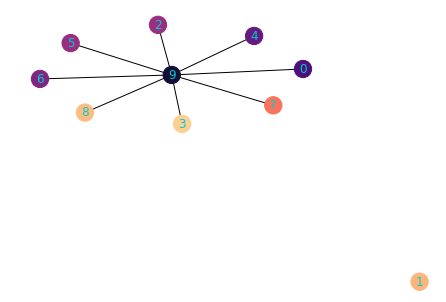

In [185]:
# Calls MY_homophilic_ba_graph
G = MY_homophilic_ba_graph(10, 9, 0, 0)
  
# Remapping opinions from [0, 100] to [-1, 1]
opinions = nx.get_node_attributes(G, 'opinion')
for curr_op in opinions:
    opinions[curr_op] = (opinions[curr_op] - 50) / 50

# Setting opinions as node attributes  
nx.set_node_attributes(G, opinions, 'opinion')
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()